# Transfert de style

In [1]:
from folyia import transfert_style as ts

Using TensorFlow backend.
/home/stage/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stage/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stage/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/stage/.local/lib/python3.6/site-packages/tensorflow/python/fra

## Récolter des images

Utiliser la fonction **ts.afficher_image(mon_image)** pour afficher une image

Le paramètre **mon_image** correspond au nom du fichier contenant l'image

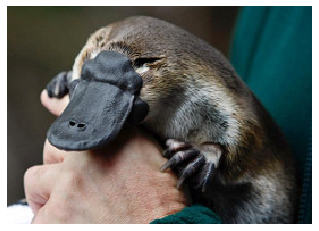

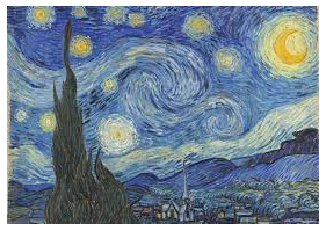

In [2]:
src_image_path = 'input/platypus.jpg'
style_image_path = 'input/style.jpeg'

ts.afficher_image(src_image_path)
ts.afficher_image(style_image_path)

## Le principe 

Combiner le contenu d'une image avec le style d'une autre image pour produire une nouvelle image. 

+ Image source : l'image qui va être modifiée (par exemple l'une de vos photos) 
+ Image de style : l'image dont vous voulez copier le style (par exemple une création de votre artiste préféré)
+ Image résultat : l'image source transformée pour avoir la même patte que l'image de style

## Comment ça fonctionne ?

Vous aurez besoin :

+ d'une fonction mesurant si le contenu de deux images est similaire ;
+ d'une fonction mesurant si le style de deux images est similaire ;
+ d'une fonction mesurant si le contenu de l'image obtenue est cohérent.

Le réseau de neurones va créer une troisième image en modifiant l'image source pour que :

+ la distance (différence) en terme de contenu, entre l'image source et l'image résultat soit la plus petite possible ;
+ la distance en terme de style, entre l'image de style et l'image résultat soit la plus petite possible ;
+ le contenu de l'image résultat soit le plus cohérent possible

## Utilisation d'un réseau de neurone pour extraire et comparer les caractéristiques des images

Pour comparer le style ou le contenu de deux images, nous ne pouvons pas nous contenter de les comparer pixel par pixel. Nous avons besoin d'un réseau de neurone capable d'analyser les images et d'en extraire ses caractéristiques principales, sous forme de vecteurs ou de matrices de nombres.

Cette première étape constitue le point de départ de tous les travaux en analyse d'images faisant intervenir les réseaux de neurones, que ce soit du transfert de style ou de la détection de visage.

## VGG19 ?

VGG19 est un réseau permettant d'identifier un objet dans une image.

Regardons ensemble comment l'utiliser : 

### Charger le bon model

Permet de télécharger le réseau de neurones VGG19, déjà entraîné pour classer des images

```
model = ts.charger_model()
```

### Afficher le model pour voir à quoi il ressemble

```
ts.afficher_model(model)
```

### Préparer une image que ce modèle va analyser


```
image = ts.charger_image(image_path)
```

### Analyser le contenu de l'image

```
analyser_contenu(image)
```

In [3]:
model =  ts.charger_model()

ts.afficher_model(model)

image = ts.charger_image(src_image_path)

ts.analyser_contenu(model, image)

W0829 19:00:41.632357 140346032756544 deprecation_wrapper.py:119] From /home/stage/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 19:00:41.665903 140346032756544 deprecation_wrapper.py:119] From /home/stage/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 19:00:41.672403 140346032756544 deprecation_wrapper.py:119] From /home/stage/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 19:00:41.728357 140346032756544 deprecation_wrapper.py:119] From /home/stage/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0829 19:00:44.625518 1

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Calculer la distance entre le contenu de deux image


Créer la fonction : 
```
def distance_entre_contenu(img1, img2):
    pass

```

cette fonction renvoit le résultat du calcul suivant

```
r1 = (img2-img1)¹ 
r2 = somme(r1)
```

In [4]:
def distance_entre_contenu(img1, img2):
    return ts.somme(ts.au_carre(img2 - img1))

## Calculer la distance entre le style de deux images

Créer la fonction : 
```
def distance_entre_style(img1, img2, nombre_de_pixels):
    pass

```

cette fonction renvoit le résultat du calcul suivant

```
r1 = determinant_gram(img1)
r2 = determinant_gram(img2)
r3 = (r1 - r2)²
r4 = somme(r3)
r5 = r4 / (4.0 * (nombre_de_couleurs²) * (nombre_de_pixels²))
```


In [5]:
def distance_entre_style(style, combinaison, nombre_de_pixels):
    S = ts.calculer_determinant_de_gram(style)
    C = ts.calculer_determinant_de_gram(combinaison)
    nombre_de_couleurs = 3
    return ts.somme(ts.au_carre(C - S)) / (4.0 * (nombre_de_couleurs ** 2) * (nombre_de_pixels ** 2))

## Evaluer la coherence d'une image


Créer la fonction : 
```
def evaluer_coherence(img, nombre_lignes, nombre_colonnes):
    pass

```

cette fonction renvoit le résultat du calcul suivant

```
dx = derivee_suivant_x(img)
dy = derivee_suivant_y(img)
r1 = dx + dy
r2 = puissance(r1, 1.25)
r3 = somme(r2)
```

In [6]:
def evaluer_coherence(img, nombre_lignes, nombre_colonnes):
    dx = ts.derivee_suivant_x(img, nombre_lignes, nombre_colonnes)
    dy = ts.derivee_suivant_y(img, nombre_lignes, nombre_colonnes)
    return ts.somme(ts.puissance(dx + dy, 1.25))

In [7]:
test = ts.Faussaire(src_image_path, style_image_path,
                 distance_entre_contenu,
                evaluer_coherence,
                distance_entre_style)
test.lancer(src_image_path, 'shae')

W0829 19:00:51.822176 140346032756544 variables.py:2429] Variable += will be deprecated. Use variable.assign_add if you want assignment to the variable value or 'x = x + y' if you want a new python Tensor object.


Model loaded.
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None,

W0829 19:00:52.152675 140346032756544 deprecation.py:323] From /home/stage/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1/5
Current loss value: 1735083300.0
Image saved as shae_0.png
2/5


KeyboardInterrupt: 